# Plot alphatectivirus hits from kraken

In [1]:
import pandas as pd
import os
import seaborn as sns
sns.set_context("notebook", font_scale=1)
import matplotlib.pyplot as plt
import matplotlib

cm = 1/2.54

## Process results

In [2]:
df_meta = pd.read_csv('../data/kraken/data/wastewater_metadata.tsv', sep='\t')

In [3]:
df_meta

,bioproject,run_acc,snakemake,post_filter,filter_info,treatment,extraction,source,doi,size_mb,desc
0,PRJNA385831,SRR5570991,True,False,-,untreated,PowerSoil,sludge,-,1802,Sludge sample was collected from the final cla...
1,PRJNA385831,SRR5570992,True,False,-,untreated,PowerSoil,sludge,-,1003,Sludge sample was collected from the final cla...
2,PRJNA385831,SRR5570993,True,False,-,untreated,PowerSoil,sludge,-,986,Sludge sample was collected from the final cla...
3,PRJNA385831,SRR5570994,True,False,-,untreated,PowerSoil,sludge,-,736,Sludge sample was collected from the final cla...
4,PRJNA385831,SRR5570995,True,False,-,untreated,PowerSoil,sludge,-,1226,Sludge sample was collected from the final cla...
...,...,...,...,...,...,...,...,...,...,...,...
285,PRJEB13831,ERR2592341,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-234,1772,USA.74f_6
286,PRJEB13831,ERR2592342,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-235,5009,USA.74g_8
287,PRJEB13831,ERR2592343,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-236,5619,ZMB.49b_6
288,baymlab,DIN,False,True,.2 um,untreated,Invitrogen Viral,wastewater,-,-,-


In [4]:
results_dir = '../../Fig4_meta/data/kraken_results/summary/'
results_dir = '../data/kraken/data/kraken_results/summary/'

In [5]:
# merge all results into single dataframe

df_list = []

for file in os.listdir(results_dir):
    if file.endswith('.summary.tsv'):
        path = os.path.join(results_dir, file)
        name = file.split('.summary.tsv')[0]
        df = pd.read_csv(path, sep='\t', names=['category', 'counts'])
        df['run_acc'] = [name] * len(df)
        df = df[['run_acc', 'category', 'counts']]
        df_list.append(df)
        

df_all = pd.concat(df_list)

In [6]:
# get total read counts processed per accesion (classified + unclassified)
df_total = df_all[df_all['category'].isin(['classified', 'unclassified'])]
# sum counts column
df_total = df_total.groupby('run_acc').agg({'counts': 'sum'}).reset_index()
df_total.columns = ['run_acc', 'total']

In [7]:
# get total reads that match_taxid per accession
df_matches = df_all[df_all['category'] == 'match_taxid']
df_matches = df_matches[['run_acc', 'counts']].reset_index(drop=True)
df_matches.columns = ['run_acc', 'matches']

In [8]:
# merge datasets
df_results = df_total.merge(df_matches, on='run_acc')
# merge with metadata
df_results = df_results.merge(df_meta, how='left')

In [68]:
#df_results.to_csv('../data/kraken/data/results.tsv', sep='\t', index=None)

In [9]:
df_results = pd.read_csv('../data/kraken/data/results.tsv', sep='\t')

In [10]:
df_results.head()

,run_acc,total,matches,bioproject,snakemake,post_filter,filter_info,treatment,extraction,source,doi,size_mb,desc
0,DIN,2133850,18,baymlab,False,True,.2 um,untreated,Invitrogen Viral,wastewater,-,-,-
1,DIS,1948559,14,baymlab,False,True,.2 um,untreated,Invitrogen Viral,wastewater,-,-,-
2,ERR1713331,40529941,5,PRJEB13831,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-3,4790,ALB.17
3,ERR1713332,16343052,3,PRJEB13831,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-4,1989,AUS.18
4,ERR1713333,6310888,0,PRJEB13831,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-5,765,AUS.18a


## Plot

In [14]:
df_nicknames = {'PRJEB13831': 'global surv',
                'PRJNA385831': 'northeast',
                'PRJEB28033': 'nyc', 
                'PRJNA622299': 'urbana', 
                'PRJNA472060': 'sand', 
                'PRJNA526679': 'israel',
                'baymlab': 'baymlab'}

In [15]:
df_results['bioproject_nn'] = df_results['bioproject'].map(df_nicknames)

In [16]:
df_results

,run_acc,total,matches,bioproject,snakemake,post_filter,filter_info,treatment,extraction,source,doi,size_mb,desc,bioproject_nn
0,DIN,2133850,18,baymlab,False,True,.2 um,untreated,Invitrogen Viral,wastewater,-,-,-,baymlab
1,DIS,1948559,14,baymlab,False,True,.2 um,untreated,Invitrogen Viral,wastewater,-,-,-,baymlab
2,ERR1713331,40529941,5,PRJEB13831,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-3,4790,ALB.17,global surv
3,ERR1713332,16343052,3,PRJEB13831,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-4,1989,AUS.18,global surv
4,ERR1713333,6310888,0,PRJEB13831,True,False,-,untreated,QIAamp Fast DNA Stool,raw sewage,10.1038/s41467-019-08853-5,765,AUS.18a,global surv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,SRR7191293,27521057,2,PRJNA472060,True,True,.2 um,concentrated,AllPrep,water,10.1186/s13104-019-4251-y,2208,reclaimed water,sand
286,SRR7191294,24228281,0,PRJNA472060,True,True,.2 um,concentrated,AllPrep,water,10.1186/s13104-019-4251-y,1945,reclaimed water,sand
287,SRR8715492,28319204,7,PRJNA526679,True,True,.45 um,"concentrated, chloroform",QIAamp UltraSens Virus,water,10.3389/fmicb.2020.00153,3890,Hospital wastewater treatment system at the Te...,israel
288,SRR8715493,27106470,38,PRJNA526679,True,True,.45 um,"concentrated, chloroform",QIAamp UltraSens Virus,water,10.3389/fmicb.2020.00153,3734,Hospital wastewater treatment system at the Te...,israel


### Joint grid

In [20]:
p = ['#CE4933', '#5862DE', '#00B283', '#9858DE', '#D0D2D3', '#16BBD7', '#DE9C39']

/tmp/ipykernel_11682/325058532.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax_joint.set_yticklabels(ylabels)


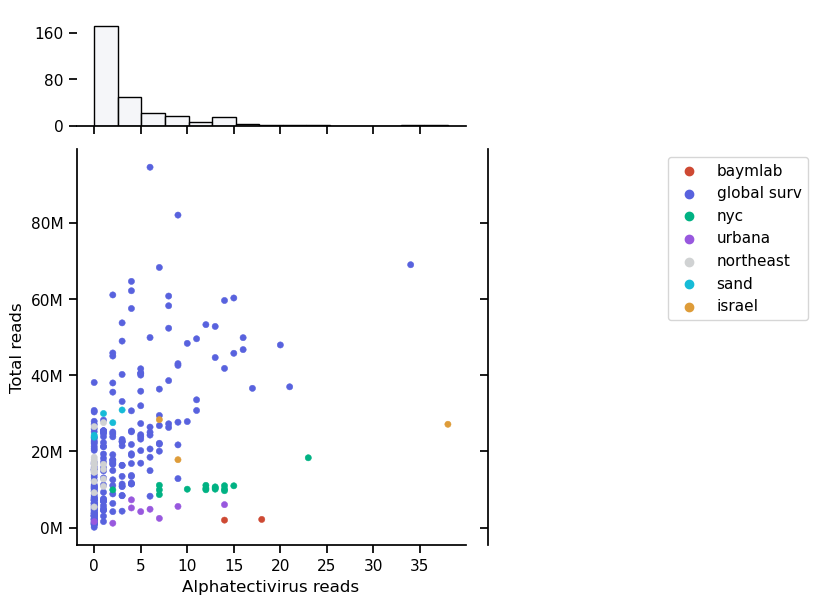

In [19]:
#df_results = df_results[df_results['matches'] < 20]

g = sns.JointGrid(ratio=3)
# histplot 
sns.histplot(data=df_results, x='matches', ax=g.ax_marg_x, legend=False, bins=15, color='#F2F4F8', edgecolor="black")
g.ax_joint.set_xlabel('Alphatectivirus reads')
g.ax_marg_x.tick_params(axis='y', labelleft=True, left ='major')
g.ax_marg_x.set_ylim(0, 200)
g.ax_marg_x.yaxis.set_major_locator(plt.MaxNLocator(3))
#plt.setp(g.ax_marg_x.get_yticklabels(), visible=True)
#plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=True)
#g.ax_marg_x.grid(True, axis='y')

# scatter
sns.scatterplot(data=df_results, x='matches', y='total', hue='bioproject_nn', palette=p, s=20, ax=g.ax_joint, alpha=1,edgecolor=None)
g.ax_joint.set_ylabel('Total reads')
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g.ax_joint.get_yticks()/1000000]
g.ax_joint.set_yticklabels(ylabels)
#g.ax_joint.set_xlim(-1, 25)
g.ax_joint.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5)) 



g.ax_joint.legend(bbox_to_anchor=(1.5, 1.0), loc='upper left')

#plt.savefig('../data/kraken/svg/plot.svg')
plt.show()